# EDA

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DATA_FN = '../data/train.csv'
TWITTER_BLUE = '#1DA1F2'
TWITTER_GRAY = '#657786'

df = pd.read_csv(DATA_FN)
for col in df.columns:
    print(col)

created_at
default_profile
default_profile_image
description
favourites_count
followers_count
friends_count
geo_enabled
id
lang
location
profile_background_image_url
profile_image_url
screen_name
statuses_count
verified
average_tweets_per_day
account_age_days
account_type
NY
Laredo
Polska
unknown
Santa Monica
unknown
Romeo Michigan
Philadelphia, PA
Washington, DC
ÜT: -6.265838,106.782951
Divinópolis, Brasil
right in front of you
Atlanta, GA
Brooklyn
Washington, DC
Lake Elmo, MN
unknown
unknown
unknown
unknown
Netherlands :)
Jersey Girl 
unknown
Chicago, IL
❤️.
Duel World
Boston, MA
unknown
unknown
unknown
Carmel, IN
Kuala Lumpur
Zhejiang
Houston, TX
unknown
unknown
Ithaca, NY
unknown
unknown
Rhode Island, USA
unknown
New York City
Saint Marys College
The city of angels 
unknown
Latvija
Posted On The 3
unknown
unknown
Libertyville, IL
Brooklyn, NY
avery.trufelman@nymag.com
Buenos Aires, Argentina.
unknown
Caracas, Venezuela
stefan.simanowitz@amnesty.org
Los Angeles, CA
unknown
Bangalore

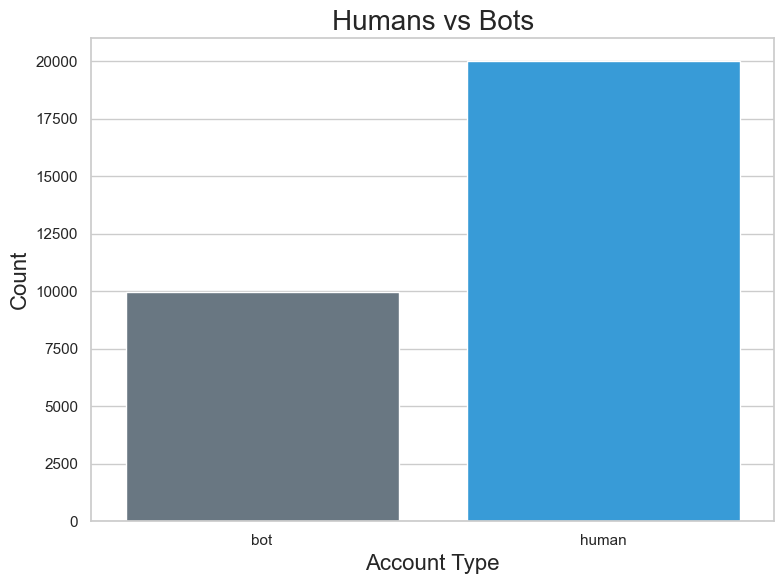

In [23]:
# Number of humans vs bots
plt.figure(figsize=(8, 6))
sns.countplot(x='account_type', data=df, palette=['#657786', TWITTER_BLUE])

plt.title('Humans vs Bots', fontsize=20)
plt.xlabel('Account Type', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.set_theme()
plt.tight_layout()
plt.show()

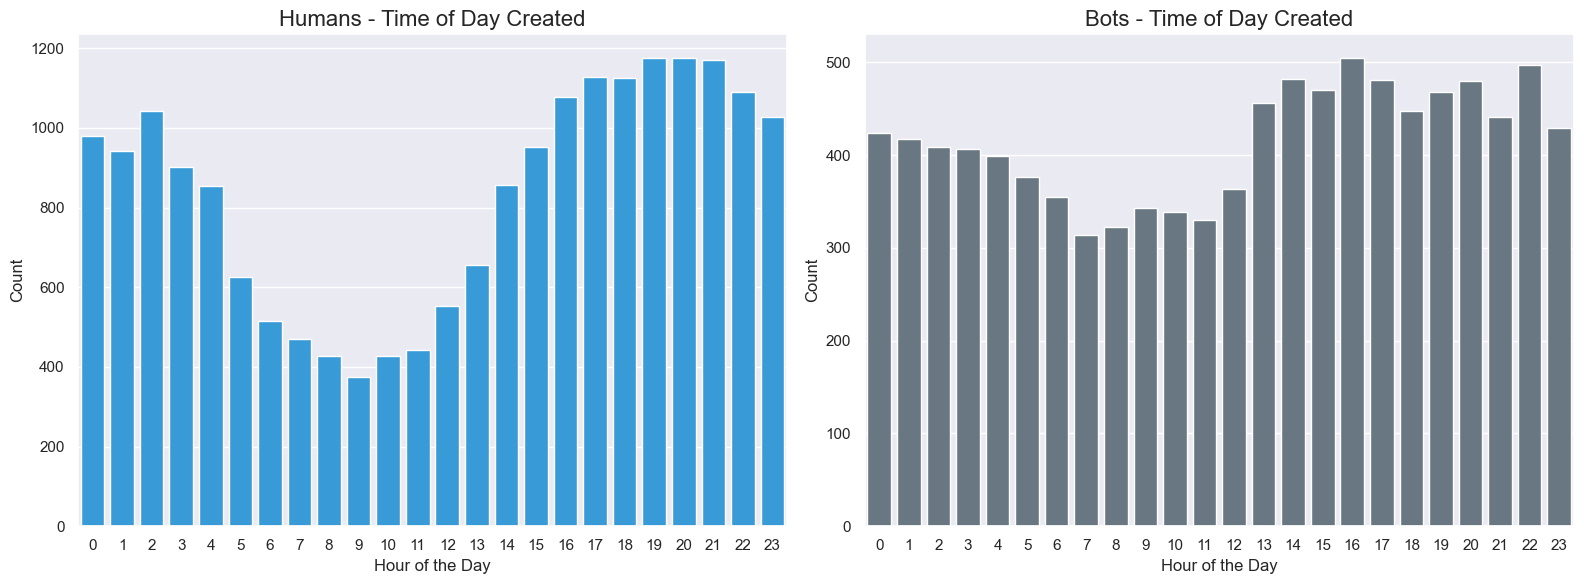

In [4]:
# Time of day accounts were created
df['created_at'] = pd.to_datetime(df['created_at'])
human_accs = df[df['account_type'] == 'human']
bot_accs = df[df['account_type'] == 'bot']
human_hours = [date.hour for date in human_accs['created_at']]
bot_hours = [date.hour for date in bot_accs['created_at']]

# Plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Humans
sns.countplot(x=human_hours, color=TWITTER_BLUE, ax=axes[0])
axes[0].set_title('Humans - Time of Day Created', fontsize=16)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Bots
sns.countplot(x=bot_hours, color=TWITTER_GRAY, ax=axes[1])
axes[1].set_title('Bots - Time of Day Created', fontsize=16)
axes[1].set_xlabel('Hour of the Day', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

sns.set_theme()
plt.tight_layout()
plt.show()

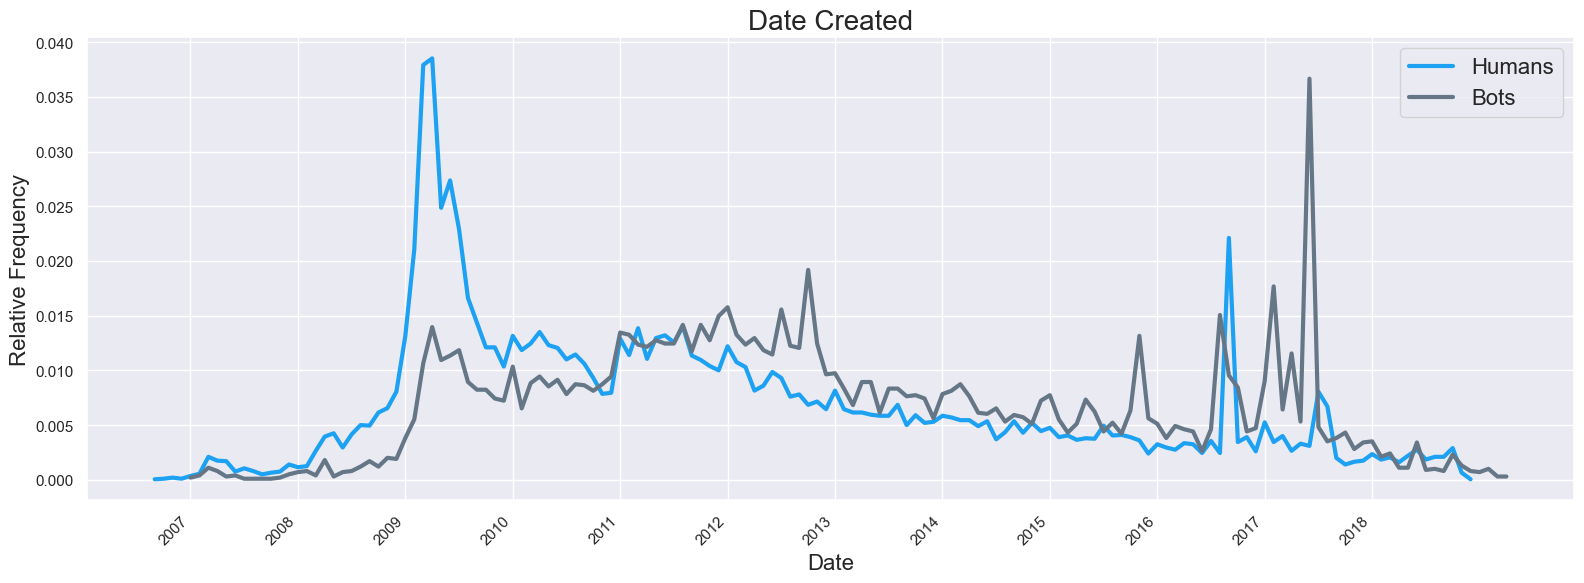

In [5]:
# Distribution of dates accounts created
def date_relative_freq(df):
    month_year = df['created_at'].dt.to_period('M')
    count_by_month_year = month_year.value_counts().sort_index()
    relative_frequency = count_by_month_year / len(df)
    return relative_frequency

df['created_at'] = pd.to_datetime(df['created_at'])
human_date_freq = date_relative_freq(human_accs)
bot_date_freq = date_relative_freq(bot_accs)

# Plot
plt.figure(figsize=(16, 6))
sns.lineplot(x=human_date_freq.index.astype(str), y=human_date_freq.values, 
                marker='', linewidth=3, color=TWITTER_BLUE, label='Humans')
sns.lineplot(x=bot_date_freq.index.astype(str), y=bot_date_freq.values, 
                marker='', linewidth=3, color=TWITTER_GRAY, label='Bots')
plt.title('Date Created', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Relative Frequency', fontsize=16)
tick_positions = [str(period) for period in human_date_freq.index if period.month == 1]
tick_labels = [period.year for period in human_date_freq.index if period.month == 1]
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')
plt.legend(fontsize=16)

sns.set_theme()
plt.tight_layout()
plt.show()

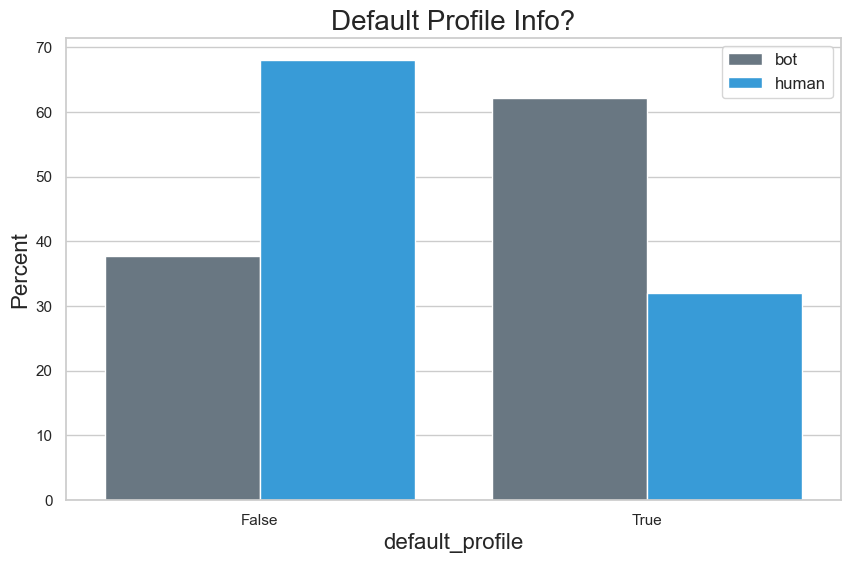

In [6]:
def grouped_count_plot(df, feature, title):
    # Calculate relative frequencies
    total_counts = len(df)
    relative_frequencies = df.groupby(['account_type', feature]).size().unstack(fill_value=0)
    relative_frequencies = relative_frequencies.div(relative_frequencies.sum(axis=1), axis=0) * 100

    # Plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    df_plot = relative_frequencies.reset_index().melt(id_vars='account_type', var_name=feature, value_name='Relative Frequency')
    sns.barplot(x=feature, y='Relative Frequency', hue='account_type', 
                data=df_plot, palette=[TWITTER_GRAY, TWITTER_BLUE])
    plt.xlabel(feature, fontsize=16)
    plt.ylabel('Percent', fontsize=16)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=12)
    plt.show()

grouped_count_plot(df, feature='default_profile', title='Default Profile Info?')

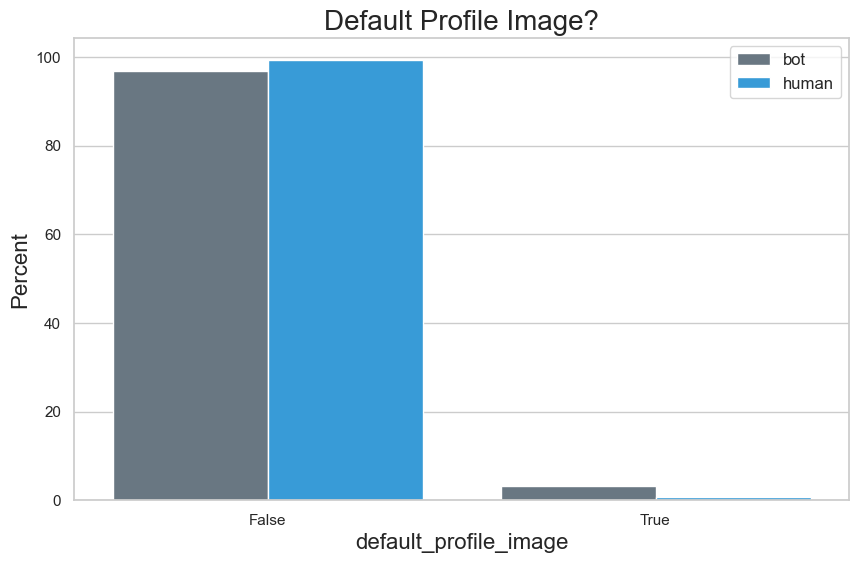

In [7]:
grouped_count_plot(df, feature='default_profile_image', title='Default Profile Image?')

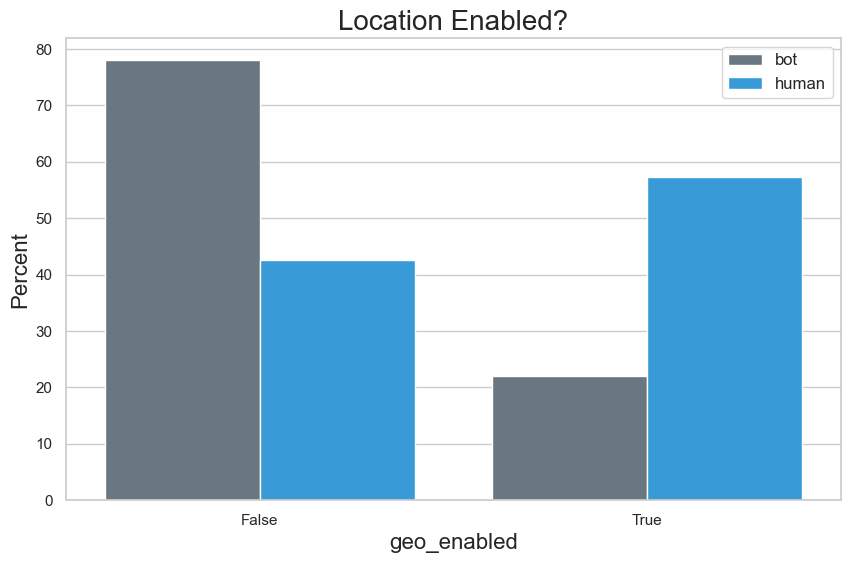

In [8]:
grouped_count_plot(df, feature='geo_enabled', title='Location Enabled?')

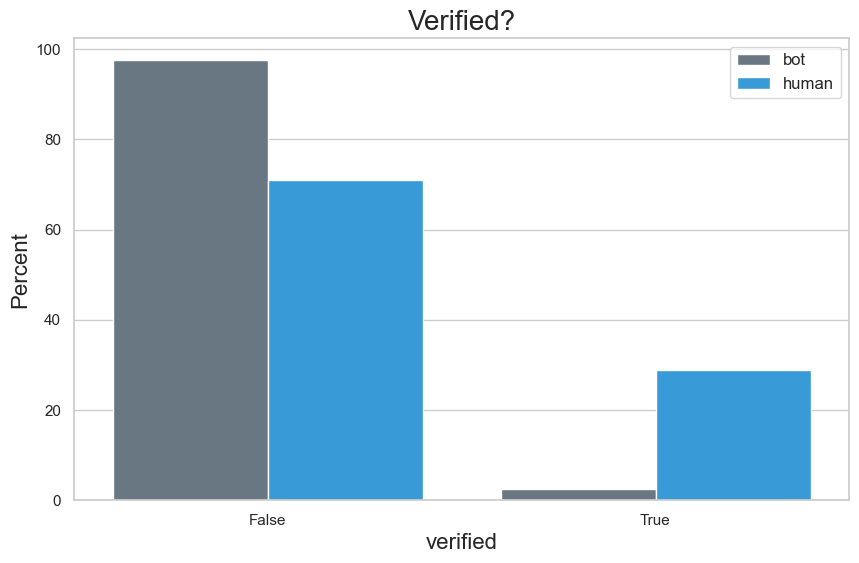

In [9]:
grouped_count_plot(df, feature='verified', title='Verified?')

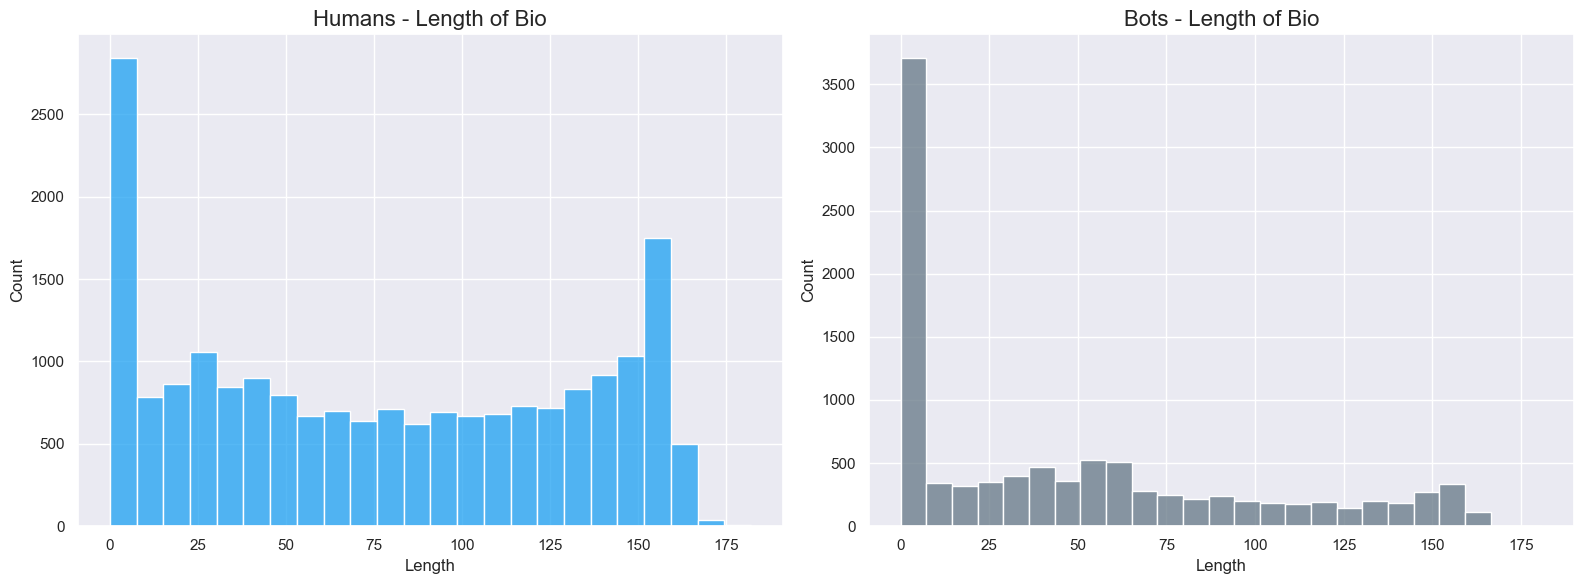

In [43]:
human_desc_lengths = [len(str(desc)) if not pd.isna(desc) else 0 for desc in human_accs['description']]
bot_desc_lengths = [len(str(desc)) if not pd.isna(desc) else 0 for desc in bot_accs['description']]

# Plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Humans
sns.histplot(x=human_desc_lengths, color=TWITTER_BLUE, ax=axes[0])
axes[0].set_title('Humans - Length of Bio', fontsize=16)
axes[0].set_xlabel('Length', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Bots
sns.histplot(x=bot_desc_lengths, color=TWITTER_GRAY, ax=axes[1])
axes[1].set_title('Bots - Length of Bio', fontsize=16)
axes[1].set_xlabel('Length', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

sns.set_theme()
plt.tight_layout()
plt.show()

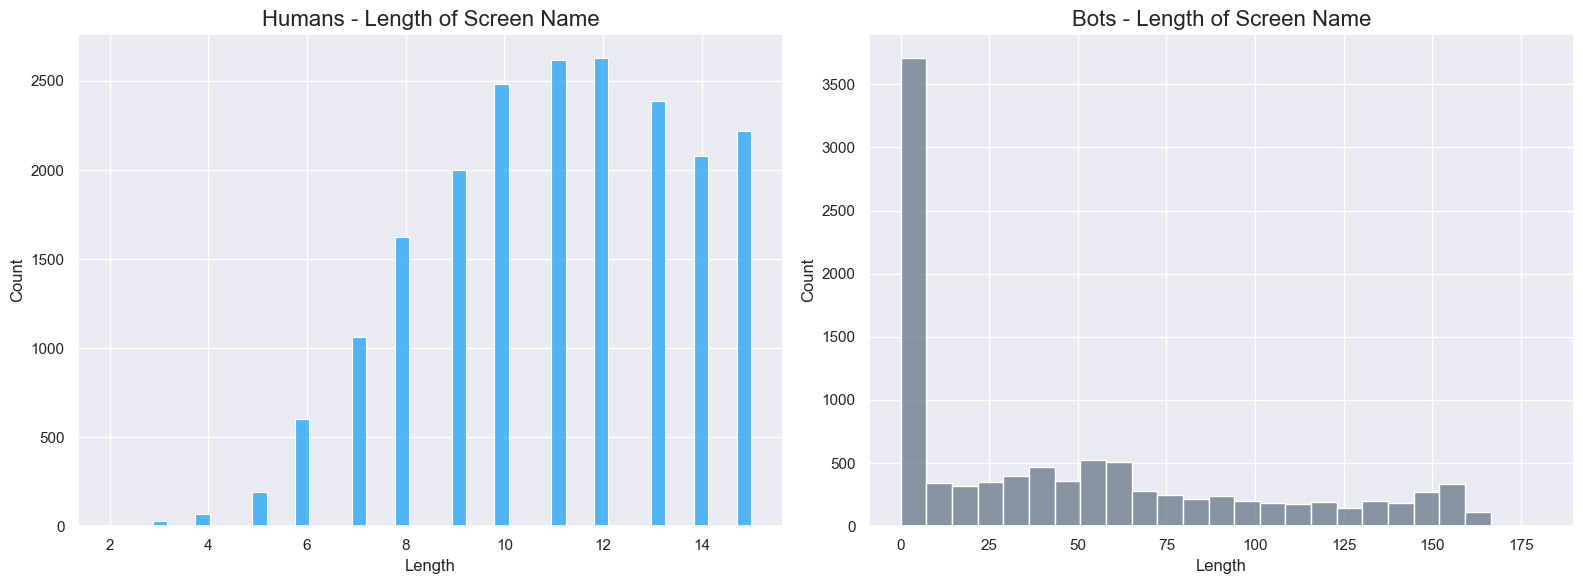

In [46]:
human_name_lengths = [len(str(name)) if not pd.isna(name) else 0 for name in human_accs['screen_name']]
bot_name_lengths = [len(str(name)) if not pd.isna(name) else 0 for name in bot_accs['screen_name']]

# Plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Humans
sns.histplot(x=human_name_lengths, color=TWITTER_BLUE, ax=axes[0])
axes[0].set_title('Humans - Length of Screen Name', fontsize=16)
axes[0].set_xlabel('Length', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Bots
sns.histplot(x=bot_desc_lengths, color=TWITTER_GRAY, ax=axes[1])
axes[1].set_title('Bots - Length of Screen Name', fontsize=16)
axes[1].set_xlabel('Length', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

sns.set_theme()
plt.tight_layout()
plt.show()

Min: 0
Max: 121641473


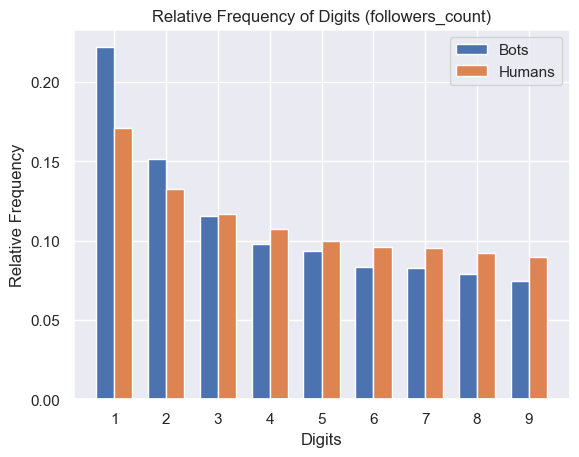

In [32]:
def plot_digit_distribution(df, feature):
    print('Min:', min(df[feature]))
    print('Max:', max(df[feature]))

    bots_followers = bot_accs[feature]
    human_followers = human_accs[feature]

    bots_digit_counts = {str(digit): bots_followers.astype(str).str.count(str(digit)).sum() for digit in range(1, 10)}
    human_digit_counts = {str(digit): human_followers.astype(str).str.count(str(digit)).sum() for digit in range(1, 10)}

    total_bots = sum(bots_digit_counts.values())
    total_humans = sum(human_digit_counts.values())

    bots_relative_freq = {digit: count / total_bots for digit, count in bots_digit_counts.items()}
    humans_relative_freq = {digit: count / total_humans for digit, count in human_digit_counts.items()}

    # Prepare data for plotting
    digits = list(bots_relative_freq.keys())
    bot_freq_values = list(bots_relative_freq.values())
    human_freq_values = list(humans_relative_freq.values())

    # Set up the bar width and positions
    bar_width = 0.35
    index = np.arange(len(digits))

    # Create grouped bar plot
    plt.bar(index, bot_freq_values, bar_width, label='Bots')
    plt.bar(index + bar_width, human_freq_values, bar_width, label='Humans')

    # Labeling and customization
    plt.xlabel('Digits')
    plt.ylabel('Relative Frequency')
    plt.title('Relative Frequency of Digits ({})'.format(feature))
    plt.xticks(index + bar_width / 2, digits)
    plt.legend()

plot_digit_distribution(df, feature='followers_count')

Min: 0
Max: 4343060


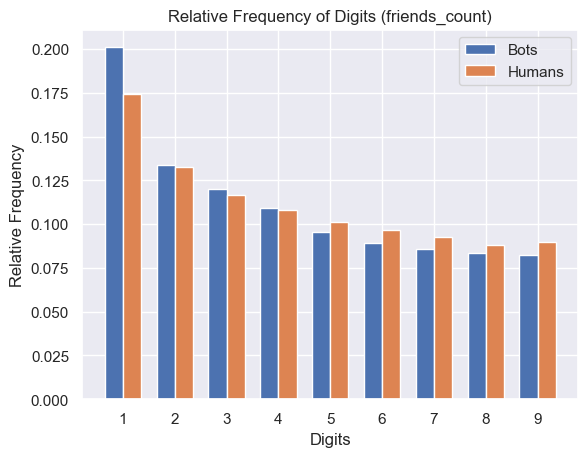

In [33]:
plot_digit_distribution(df, feature='friends_count')

Min: 0
Max: 885123


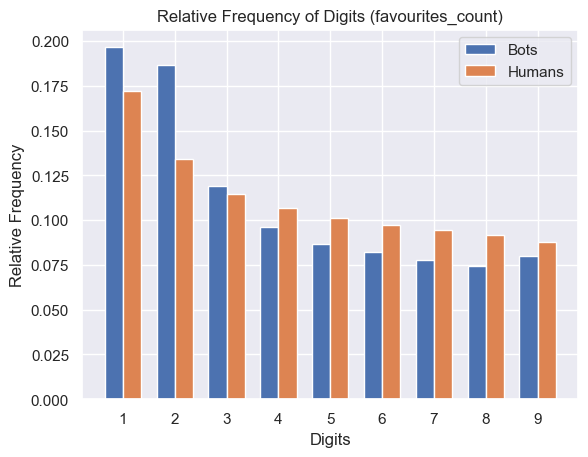

In [34]:
plot_digit_distribution(df, feature='favourites_count')

Min: 0
Max: 2771910


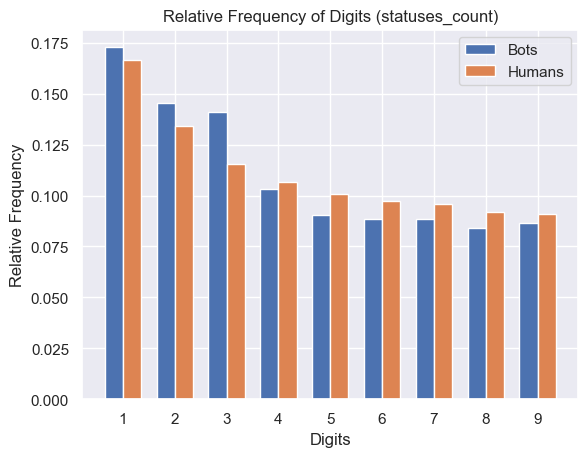

In [35]:
plot_digit_distribution(df, feature='statuses_count')